# Analytical Solutions
### Task 1

Full assignment: https://gist.github.com/RafalKucharskiPK/c3bc960f047829569808ccbcffc3b8ce

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Introduction

## Problem Description

We explore a transportation system containing two routes (a and b) connecting an origin (O) to a destination (D). A set of Q individual travelers must make a decision on which route to take, based on the travel time and their preferences.

The travel time on each arc (a or b) is represented by a non-linearly increasing BPR formula:

$t_a(q_a) = t^0_a (1 + (q_a / Q_a)^2)$

where:
* $t_a(q_a)$ - is the travel time on arc a (or b)
* $q_a$ - is the flow (number of vehicles using arc)
* $t^0_a$ - is the free flow speed (with no other vehicles)
* $Q_a$ - is the capacity (maximal number of vehices)

In [14]:
travel_time = lambda q_x, t0_x, Q_x: (t0_x * (1 + ((q_x / Q_x) ** 2)))

Following the parameterization:

* $Q$ = 1000 veh/h
* $t^0_a$ = 5 min
* $t^0_b$ = 15 min
* $Q_a$ = 500 veh/h
* $Q_b$ = 800 veh/h

In [1]:
Q = 1000
t0_a = 5 / 60
t0_b = 15 / 60
Q_a = 500
Q_b = 800

## Objectives

The main objectives of this notebook are the analytic computations of:

1. **System Optimum (SO)**: To find the optimal distribution of travelers between routes a and b that minimizes the total cost (travel time) across all individuals. We seek to minimize:

   $t_a(q_a)* q_a + t_b(q_b) * q_b$, s.t. $q_a + q_b = Q$ , $q_a, q_b \geq 0$

In [20]:
def total_cost(q_a, t0_a, Q_a, q_b, t0_b, Q_b, Q):
    if (q_a + q_b != Q):
        raise ValueError("Invalid configuration: Number of vehicles does not match Q.")
    elif (q_a < 0) or (q_b < 0):
        raise ValueError("Invalid configuration: Numbers of vehicles cannot be negative.")
    else:
        return (travel_time(q_a, t0_a, Q_a) * q_a) + (travel_time(q_b, t0_b, Q_b) * q_b)

2. **User Equilibrium (UE)**: To find the state where every traveler is individually satisfied with their choice, meaning that the travel time on both routes is equal:

   $t_a(q_a) = t_b(q_b)$

# Exploratory Analysis

In [23]:
q_range = [x for x in range(Q)]

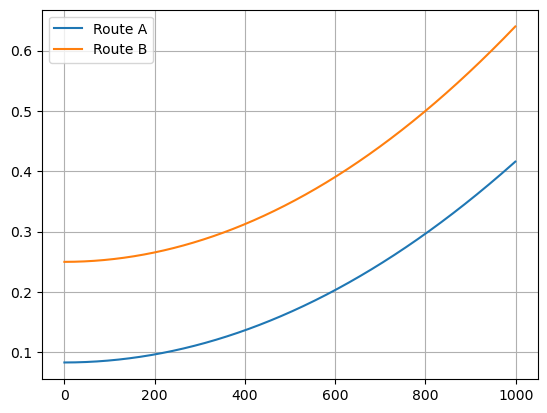

In [24]:
plt.plot(q_range, [travel_time(q_x, t0_a, Q_a) for q_x in q_range], label = "Route A")
plt.plot(q_range, [travel_time(q_x, t0_b, Q_b) for q_x in q_range], label = "Route B")
plt.legend()
plt.grid(True)
plt.show()

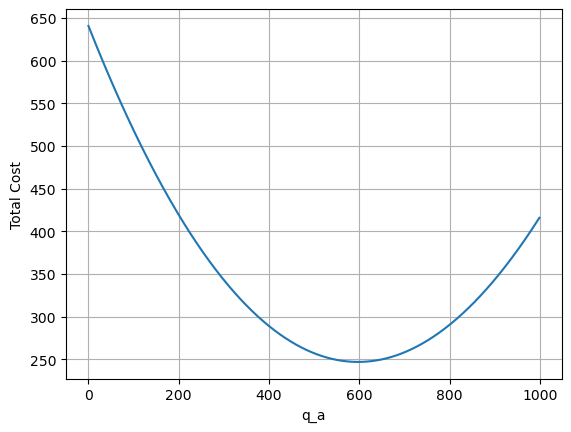

In [26]:
plt.plot(q_range, [total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q) for q_a in q_range])
plt.xlabel('q_a')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

In [32]:
min_cost = float('inf')
min_cost_qa = None

for q_a in q_range:
    cost = total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q)
    if cost < min_cost:
        min_cost = cost
        min_cost_qa = q_a
        
print("System Optimum:\nq_a: %d\nq_b: %d\nCost: %.3f" % (min_cost_qa, Q-min_cost_qa, min_cost))

System Optimum:
q_a: 597
q_b: 403
Cost: 246.992


# System Optimum (SO) Analysis

$Total Cost = t_a(q_a)* q_a + t_b(q_b) * q_b$<br/>
<br/>$Total Cost = t_a(q_a)* q_a + t_b(Q - q_a) * (Q - q_a)$ given $q_b = Q - q_a$ <br/>
<br/>$Total Cost = (\dfrac{5}{60} * (1 + (\dfrac{q_a}{500})^2) * q_a + (\dfrac{15}{60}) * (1 + (\dfrac{(1000 - q_a)}{800})^2) * (1000 - q_a)$ given the parameterization.<br/>
<br/>$Total Cost$ is minimized where $d(Total Cost)/dq_a = 0$.<br/>
<br/>Differentiating the total cost with respect to $q_a$, we get $-\dfrac{33x^2-450000x+257000000}{192000000}$ <br/>


In [80]:
first_order = lambda q_a: -(33*(q_a**2)-450000*q_a+257000000)/192000000

<br/>In second order: $-\dfrac{66x-450000}{192000000}$ <br/>

In [81]:
second_order = lambda q_a: -(((66*q_a)-450000)/192000000)

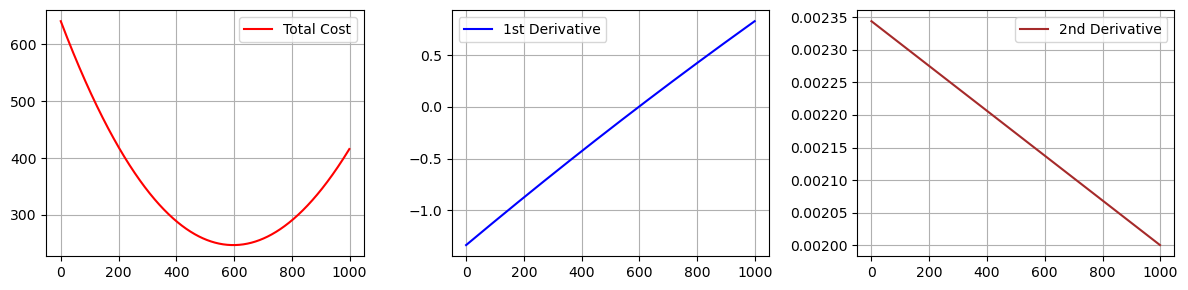

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].plot(q_range, [total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q) for q_a in q_range], label="Total Cost", color="red")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(q_range, [first_order(q_a) for q_a in q_range], label="1st Derivative", color="blue")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(q_range, [second_order(q_a) for q_a in q_range], label="2nd Derivative", color="brown")
axs[2].legend()
axs[2].grid(True)

fig.tight_layout()

In [91]:
def newton_raphson(initial_guess, tolerance, max_iter):
    q_a = initial_guess
    
    iteration = 0
    while iteration < max_iter:
        q_a_new = q_a - first_order(q_a) / second_order(q_a)
        if abs(q_a_new - q_a) < tolerance:
            break
        q_a = q_a_new
        iteration += 1
    return q_a

In [92]:
round(newton_raphson(250, 1e-6, 1000))

597